In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# DataSet 25

In [198]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book25.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1127,WEST UTTAR PRADESH,1901,51.4,25.6,9.5,0.7,5.6,23.8,201.9,374.3,67.7,7.6,0.0,7.9,775.9,76.9,15.8,667.7,15.4
1,1128,WEST UTTAR PRADESH,1902,4.6,4.6,0.6,4.8,7.2,54.5,325.9,180.6,143.1,9.6,0.9,0.2,736.6,9.2,12.7,704.1,10.6
2,1129,WEST UTTAR PRADESH,1903,13.4,0.4,1.2,0.0,8.2,32.7,145.4,279.1,150.4,177.3,0.0,0.4,808.4,13.7,9.4,607.6,177.6
3,1130,WEST UTTAR PRADESH,1904,6.3,2.0,29.7,0.4,24.8,68.5,358.8,311.1,97.1,2.7,15.7,28.2,945.2,8.2,54.9,835.5,46.6
4,1131,WEST UTTAR PRADESH,1905,32.3,26.6,14.8,3.6,7.1,18.9,139.8,95.0,92.2,0.2,0.0,2.9,433.5,59.0,25.5,345.9,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1237,WEST UTTAR PRADESH,2011,2.1,10.4,3.9,2.8,29.6,175.9,215.9,232.3,101.7,0.7,0.5,1.5,777.4,12.5,36.3,725.9,2.7
111,1238,WEST UTTAR PRADESH,2012,14.5,0.1,1.4,4.7,0.3,4.0,145.1,149.1,67.8,0.5,0.1,2.0,389.6,14.5,6.4,366.0,2.7
112,1239,WEST UTTAR PRADESH,2013,20.4,69.5,3.5,1.6,2.1,190.6,233.9,287.1,52.2,61.2,1.7,8.9,932.8,89.9,7.2,763.8,71.8
113,1240,WEST UTTAR PRADESH,2014,48.3,29.4,22.6,5.3,11.0,22.0,151.6,81.0,84.7,14.6,0.0,16.3,486.9,77.7,39.0,339.4,30.8


In [199]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [200]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1127,WEST UTTAR PRADESH,1901,51.4,25.6,9.5,0.7,5.6,23.8,201.9,374.3,67.7,7.6,0.0,7.9,775.9,76.9,15.8,667.7,15.4
1,1128,WEST UTTAR PRADESH,1902,4.6,4.6,0.6,4.8,7.2,54.5,325.9,180.6,143.1,9.6,0.9,0.2,736.6,9.2,12.7,704.1,10.6
2,1129,WEST UTTAR PRADESH,1903,13.4,0.4,1.2,0.0,8.2,32.7,145.4,279.1,150.4,177.3,0.0,0.4,808.4,13.7,9.4,607.6,177.6
3,1130,WEST UTTAR PRADESH,1904,6.3,2.0,29.7,0.4,24.8,68.5,358.8,311.1,97.1,2.7,15.7,28.2,945.2,8.2,54.9,835.5,46.6
4,1131,WEST UTTAR PRADESH,1905,32.3,26.6,14.8,3.6,7.1,18.9,139.8,95.0,92.2,0.2,0.0,2.9,433.5,59.0,25.5,345.9,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1237,WEST UTTAR PRADESH,2011,2.1,10.4,3.9,2.8,29.6,175.9,215.9,232.3,101.7,0.7,0.5,1.5,777.4,12.5,36.3,725.9,2.7
111,1238,WEST UTTAR PRADESH,2012,14.5,0.1,1.4,4.7,0.3,4.0,145.1,149.1,67.8,0.5,0.1,2.0,389.6,14.5,6.4,366.0,2.7
112,1239,WEST UTTAR PRADESH,2013,20.4,69.5,3.5,1.6,2.1,190.6,233.9,287.1,52.2,61.2,1.7,8.9,932.8,89.9,7.2,763.8,71.8
113,1240,WEST UTTAR PRADESH,2014,48.3,29.4,22.6,5.3,11.0,22.0,151.6,81.0,84.7,14.6,0.0,16.3,486.9,77.7,39.0,339.4,30.8


<AxesSubplot:>

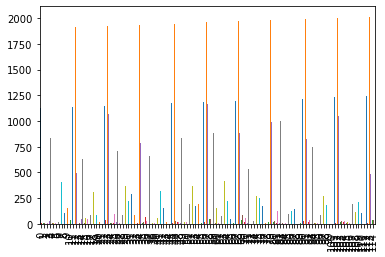

In [201]:
b.plot.bar(legend=None)

<AxesSubplot:>

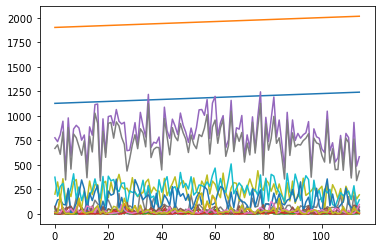

In [202]:
b.plot.line(legend=None)

<AxesSubplot:>

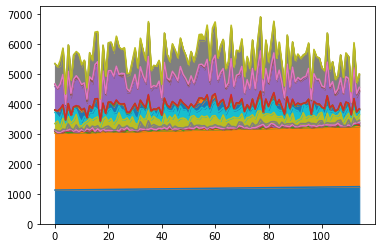

In [203]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

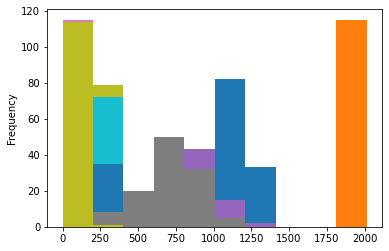

In [204]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='YEAR'>

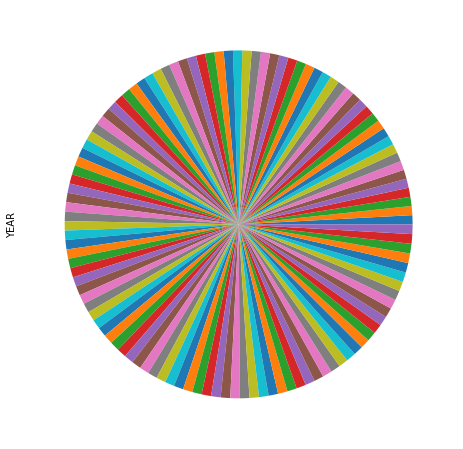

In [205]:
b.plot.pie(y='YEAR',figsize=(8,8),labels=None,legend=None)

# DataSet 26

In [206]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book26.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,ANDAMAN & NICOBAR ISLANDS,2011,265.9,84.8,272.8,111.4,326.5,383.2,583.2,441.5,757.1,212.3,150.8,238.5,3828.0,350.7,710.7,2165.0,601.6
106,106,ANDAMAN & NICOBAR ISLANDS,2012,119.9,45.6,30.9,55.8,533.9,458.2,317.3,369.6,868.9,209.7,300.5,187.3,3497.6,165.6,620.5,2014.0,697.5
107,107,ANDAMAN & NICOBAR ISLANDS,2013,67.1,37.6,43.0,46.3,509.3,777.0,564.8,336.7,473.6,455.8,354.2,92.3,3757.8,104.7,598.6,2152.1,902.4
108,108,ANDAMAN & NICOBAR ISLANDS,2014,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,402.6,201.2,100.4,2622.4,50.5,249.1,1618.7,704.2


In [207]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        110 non-null    int64  
 1   SUBDIVISION  110 non-null    object 
 2   YEAR         110 non-null    int64  
 3   JAN          110 non-null    float64
 4   FEB          110 non-null    float64
 5   MAR          108 non-null    float64
 6   APR          108 non-null    float64
 7   MAY          109 non-null    float64
 8   JUN          108 non-null    float64
 9   JUL          108 non-null    float64
 10  AUG          108 non-null    float64
 11  SEP          107 non-null    float64
 12  OCT          108 non-null    float64
 13  NOV          108 non-null    float64
 14  DEC          107 non-null    float64
 15  ANNUAL       104 non-null    float64
 16  Jan-Feb      110 non-null    float64
 17  Mar-May      107 non-null    float64
 18  Jun-Sep      107 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

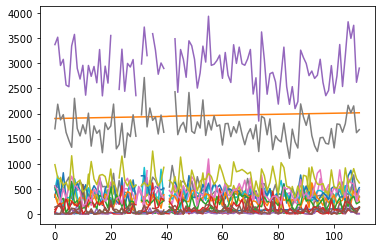

In [208]:
a.plot.line(legend=None)

<AxesSubplot:>

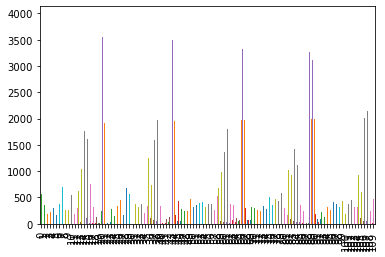

In [209]:
a.plot.bar(legend=None)

<AxesSubplot:>

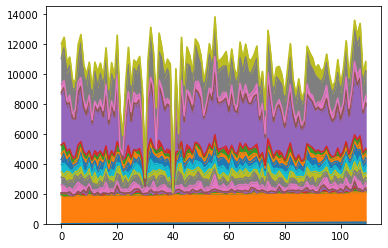

In [210]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

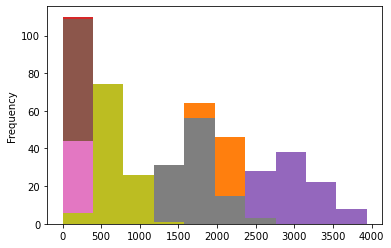

In [211]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAY'>

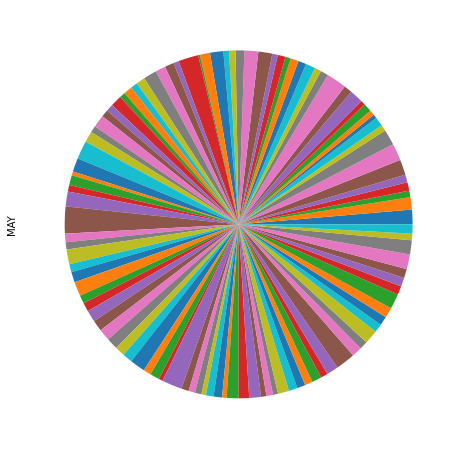

In [212]:
a.plot.pie(y='MAY',figsize=(8,8),labels=None,legend=None)

# DataSet 27

In [213]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book27.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,110,ARUNACHAL PRADESH,1916,48.1,69.8,71.1,316.1,424.6,1124.9,NaN,629.7,333.9,NaN,NaN,NaN,NaN,117.9,811.8,NaN,NaN
1,111,ARUNACHAL PRADESH,1917,21.4,164.5,NaN,269.6,107.9,823.8,909.1,628.4,411.5,199.3,63.5,0.0,NaN,185.9,NaN,2772.8,262.8
2,112,ARUNACHAL PRADESH,1918,10.4,11.0,191.2,144.6,861.1,1609.9,1303.0,692.6,515.8,125.2,7.8,13.7,5486.3,21.4,1196.9,4121.3,146.7
3,113,ARUNACHAL PRADESH,1919,34.5,67.8,28.5,256.9,420.6,973.6,999.0,286.7,628.7,948.3,40.7,8.6,4693.9,102.3,706.0,2888.0,997.6
4,114,ARUNACHAL PRADESH,1920,14.0,196.3,605.6,364.7,173.6,840.6,535.4,896.5,376.7,103.3,0.0,0.0,4106.7,210.3,1143.9,2649.2,103.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,202,ARUNACHAL PRADESH,2011,40.0,51.3,174.5,240.8,219.6,288.4,531.4,277.6,286.7,51.9,16.2,15.2,2193.7,91.4,634.9,1384.2,83.3
93,203,ARUNACHAL PRADESH,2012,57.8,35.8,134.2,403.4,187.4,645.8,638.9,316.0,724.9,248.1,22.0,26.2,3440.3,93.6,724.9,2325.6,296.3
94,204,ARUNACHAL PRADESH,2013,18.5,40.5,115.1,175.1,335.8,290.0,329.6,230.2,316.1,164.1,13.3,14.6,2042.9,59.0,626.0,1165.9,192.0
95,205,ARUNACHAL PRADESH,2014,19.0,101.9,80.3,86.7,299.0,415.8,392.4,599.6,343.0,35.1,20.1,10.2,2403.2,120.9,466.0,1750.8,65.4


In [214]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        97 non-null     int64  
 1   SUBDIVISION  97 non-null     object 
 2   YEAR         97 non-null     int64  
 3   JAN          96 non-null     float64
 4   FEB          96 non-null     float64
 5   MAR          95 non-null     float64
 6   APR          97 non-null     float64
 7   MAY          97 non-null     float64
 8   JUN          96 non-null     float64
 9   JUL          96 non-null     float64
 10  AUG          97 non-null     float64
 11  SEP          97 non-null     float64
 12  OCT          95 non-null     float64
 13  NOV          95 non-null     float64
 14  DEC          95 non-null     float64
 15  ANNUAL       91 non-null     float64
 16  Jan-Feb      96 non-null     float64
 17  Mar-May      95 non-null     float64
 18  Jun-Sep      95 non-null     float64
 19  Oct-Dec   

<AxesSubplot:>

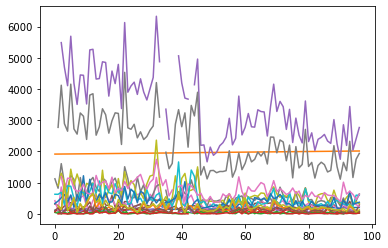

In [215]:
a.plot.line(legend=None)

<AxesSubplot:>

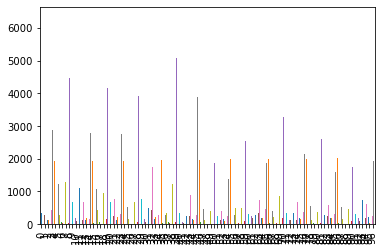

In [216]:
a.plot.bar(legend=None)

<AxesSubplot:>

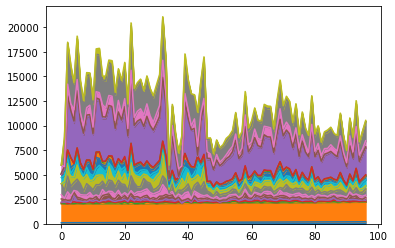

In [217]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

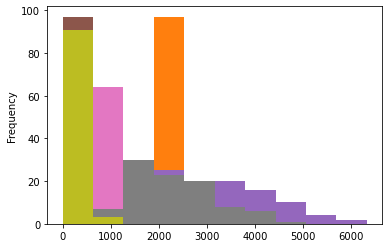

In [218]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='FEB'>

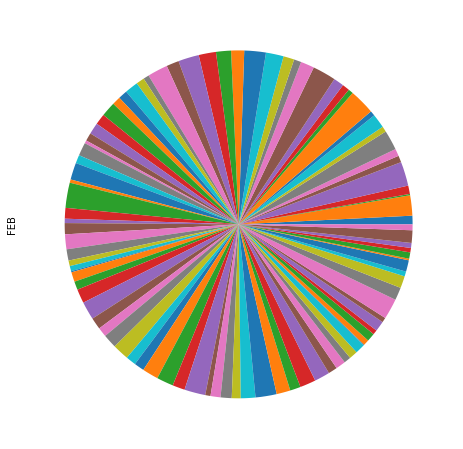

In [219]:
a.plot.pie(y='FEB',figsize=(8,8),labels=None,legend=None)

# DataSet 28

In [220]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book28.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,207,ASSAM & MEGHALAYA,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2,2498.6,46.6,460.5,1710.9,280.5
1,208,ASSAM & MEGHALAYA,1902,9.3,10.2,105.6,350.0,262.1,620.7,510.8,536.0,441.3,97.0,7.8,1.3,2952.1,19.4,717.6,2108.9,106.2
2,209,ASSAM & MEGHALAYA,1903,19.9,25.4,103.6,140.6,206.6,607.4,362.7,551.9,306.4,159.5,59.3,1.3,2544.7,45.4,450.8,1828.5,220.1
3,210,ASSAM & MEGHALAYA,1904,11.1,56.1,51.9,457.1,375.2,385.7,477.6,438.8,245.9,115.9,46.4,2.5,2664.1,67.1,884.2,1548.0,164.8
4,211,ASSAM & MEGHALAYA,1905,19.9,16.9,137.9,213.0,275.5,521.7,439.1,649.1,276.0,200.0,16.8,24.8,2790.6,36.8,626.3,1886.0,241.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,317,ASSAM & MEGHALAYA,2011,11.1,11.4,109.0,92.1,238.3,316.0,395.8,302.6,221.6,30.2,11.9,3.5,1743.4,22.5,439.4,1236.0,45.6
111,318,ASSAM & MEGHALAYA,2012,15.2,6.9,28.8,279.1,185.8,729.7,444.3,289.2,411.6,199.4,17.1,2.3,2609.4,22.1,493.7,1874.8,218.8
112,319,ASSAM & MEGHALAYA,2013,1.1,9.6,44.0,112.8,346.7,286.2,367.8,289.7,229.3,126.3,1.0,2.0,1816.4,10.7,503.5,1172.9,129.3
113,320,ASSAM & MEGHALAYA,2014,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,2206.1,30.3,431.9,1705.5,38.5


In [221]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [222]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,207,ASSAM & MEGHALAYA,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2,2498.6,46.6,460.5,1710.9,280.5
1,208,ASSAM & MEGHALAYA,1902,9.3,10.2,105.6,350.0,262.1,620.7,510.8,536.0,441.3,97.0,7.8,1.3,2952.1,19.4,717.6,2108.9,106.2
2,209,ASSAM & MEGHALAYA,1903,19.9,25.4,103.6,140.6,206.6,607.4,362.7,551.9,306.4,159.5,59.3,1.3,2544.7,45.4,450.8,1828.5,220.1
3,210,ASSAM & MEGHALAYA,1904,11.1,56.1,51.9,457.1,375.2,385.7,477.6,438.8,245.9,115.9,46.4,2.5,2664.1,67.1,884.2,1548.0,164.8
4,211,ASSAM & MEGHALAYA,1905,19.9,16.9,137.9,213.0,275.5,521.7,439.1,649.1,276.0,200.0,16.8,24.8,2790.6,36.8,626.3,1886.0,241.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,317,ASSAM & MEGHALAYA,2011,11.1,11.4,109.0,92.1,238.3,316.0,395.8,302.6,221.6,30.2,11.9,3.5,1743.4,22.5,439.4,1236.0,45.6
111,318,ASSAM & MEGHALAYA,2012,15.2,6.9,28.8,279.1,185.8,729.7,444.3,289.2,411.6,199.4,17.1,2.3,2609.4,22.1,493.7,1874.8,218.8
112,319,ASSAM & MEGHALAYA,2013,1.1,9.6,44.0,112.8,346.7,286.2,367.8,289.7,229.3,126.3,1.0,2.0,1816.4,10.7,503.5,1172.9,129.3
113,320,ASSAM & MEGHALAYA,2014,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,2206.1,30.3,431.9,1705.5,38.5


<AxesSubplot:>

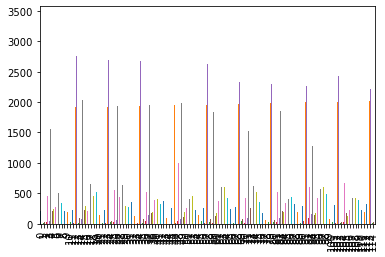

In [223]:
b.plot.bar(legend=None)

<AxesSubplot:>

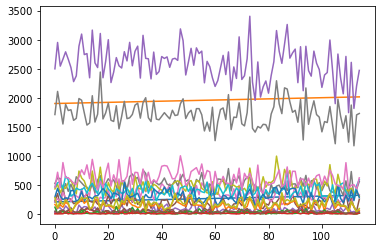

In [224]:
b.plot.line(legend=None)

<AxesSubplot:>

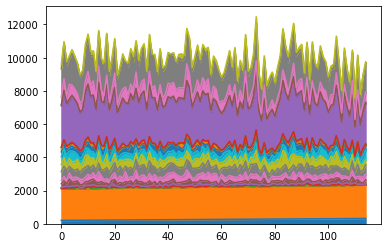

In [225]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

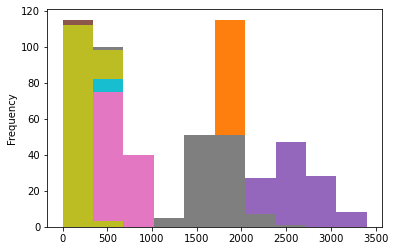

In [226]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='JUL'>

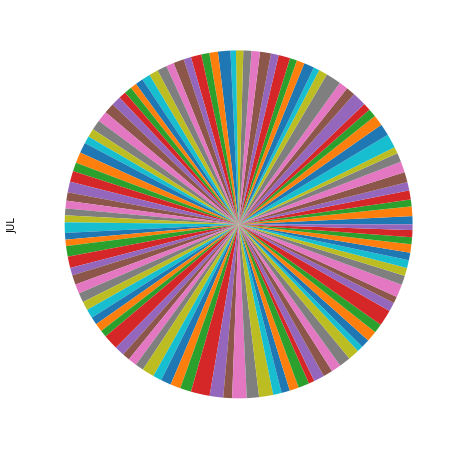

In [227]:
b.plot.pie(y='JUL',figsize=(8,8),labels=None,legend=None)

# DataSet 29

In [228]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book29.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,322,NAGA MANI MIZO TRIPURA,1901,11.7,18.1,29.4,206.2,124.0,443.3,331.4,466.0,304.1,166.7,67.4,0.0,2168.4,29.8,359.6,1544.8,234.2
1,323,NAGA MANI MIZO TRIPURA,1902,4.8,0.5,36.3,297.8,215.5,480.1,392.4,312.8,318.7,102.4,8.9,4.7,2175.0,5.2,549.7,1504.0,116.0
2,324,NAGA MANI MIZO TRIPURA,1903,6.5,40.5,139.8,45.5,159.9,458.6,300.2,470.6,366.1,166.4,76.7,0.1,2230.7,47.0,345.1,1595.4,243.2
3,325,NAGA MANI MIZO TRIPURA,1904,2.3,46.9,47.5,290.3,230.5,455.3,423.5,423.6,375.8,128.9,90.0,5.0,2519.8,49.3,568.3,1678.2,224.0
4,326,NAGA MANI MIZO TRIPURA,1905,9.1,35.3,306.5,161.7,193.6,339.7,450.1,429.9,320.1,246.4,8.0,27.1,2527.6,44.5,661.8,1539.8,281.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,432,NAGA MANI MIZO TRIPURA,2011,12.6,3.6,51.4,81.1,334.9,374.2,313.3,367.6,258.3,92.6,2.4,0.2,1892.1,16.1,467.4,1313.4,95.2
111,433,NAGA MANI MIZO TRIPURA,2012,24.5,10.2,20.3,243.5,163.5,396.2,280.1,342.7,248.7,160.9,32.0,0.4,1922.9,34.7,427.3,1267.6,193.3
112,434,NAGA MANI MIZO TRIPURA,2013,0.2,5.7,19.7,60.3,348.9,206.6,255.9,291.3,241.4,125.6,0.3,1.2,1557.2,5.9,428.9,995.2,127.1
113,435,NAGA MANI MIZO TRIPURA,2014,1.2,21.0,25.4,49.6,192.5,268.3,295.7,372.3,300.9,69.6,3.3,0.1,1599.9,22.2,267.5,1237.2,73.0


In [229]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

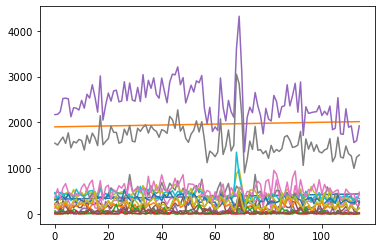

In [230]:
a.plot.line(legend=None)

<AxesSubplot:>

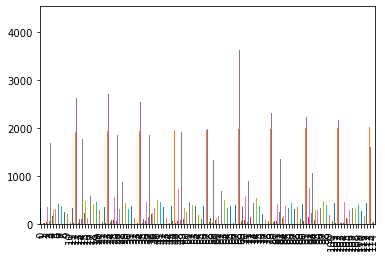

In [231]:
a.plot.bar(legend=None)

<AxesSubplot:>

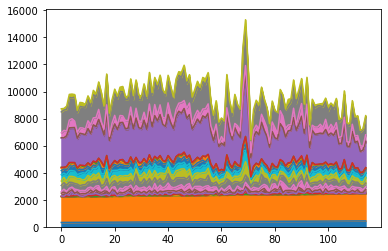

In [232]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

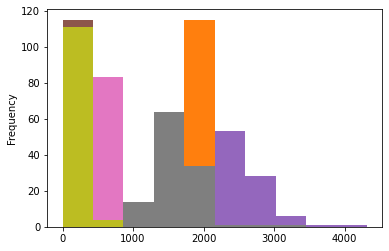

In [233]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAR'>

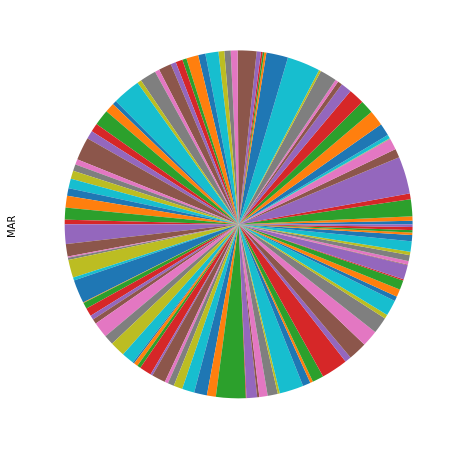

In [234]:
a.plot.pie(y='MAR',figsize=(8,8),labels=None,legend=None)

# DataSet 30

In [235]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book30.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,437,SUB HIMALAYAN WEST BENGAL & SIKKIM,1901,26.5,14.8,14.1,29.2,195.5,488.4,524.8,501.1,242.7,55.5,17.9,2.6,2113.2,41.3,238.9,1757.0,76.1
1,438,SUB HIMALAYAN WEST BENGAL & SIKKIM,1902,1.2,0.7,87.1,126.1,271.3,539.2,671.0,603.8,799.9,74.4,5.6,0.0,3180.4,1.9,484.6,2613.9,80.1
2,439,SUB HIMALAYAN WEST BENGAL & SIKKIM,1903,5.5,8.7,19.6,18.6,163.6,541.2,431.5,708.8,365.2,141.3,0.3,0.0,2404.5,14.3,201.9,2046.7,141.6
3,440,SUB HIMALAYAN WEST BENGAL & SIKKIM,1904,3.4,29.2,0.9,124.3,333.6,274.2,500.4,468.5,260.6,164.8,8.9,1.1,2169.9,32.5,458.8,1503.7,174.8
4,441,SUB HIMALAYAN WEST BENGAL & SIKKIM,1905,12.0,31.2,51.9,104.4,290.6,524.8,523.1,1036.6,321.1,87.9,2.7,18.7,3005.0,43.2,447.0,2405.6,109.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,547,SUB HIMALAYAN WEST BENGAL & SIKKIM,2011,8.5,19.9,71.2,135.0,247.8,419.8,612.3,470.3,356.3,46.7,26.7,4.3,2418.7,28.4,453.9,1858.6,77.7
111,548,SUB HIMALAYAN WEST BENGAL & SIKKIM,2012,15.3,13.9,45.5,159.8,202.4,604.2,684.5,332.7,434.7,119.4,12.5,7.4,2632.2,29.2,407.7,2056.0,139.3
112,549,SUB HIMALAYAN WEST BENGAL & SIKKIM,2013,3.0,23.6,32.1,114.7,296.5,404.9,588.4,416.3,308.0,199.8,16.1,2.7,2406.1,26.7,443.4,1717.6,218.5
113,550,SUB HIMALAYAN WEST BENGAL & SIKKIM,2014,0.2,26.6,37.7,47.9,308.6,543.2,384.6,563.3,371.5,31.2,5.3,2.4,2322.6,26.9,394.2,1862.6,38.9


In [236]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

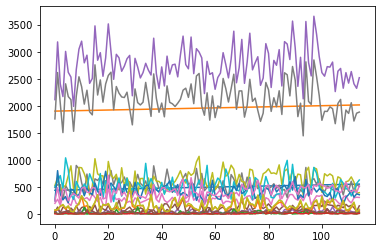

In [237]:
a.plot.line(legend=None)

<AxesSubplot:>

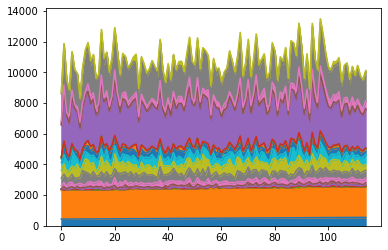

In [238]:
a.plot.area(legend=None)

<AxesSubplot:>

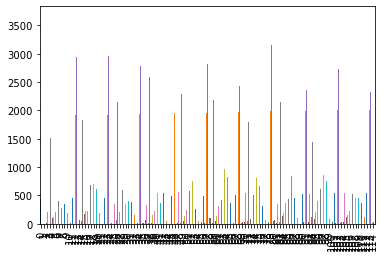

In [239]:
a.plot.bar(legend=None)

<AxesSubplot:ylabel='Frequency'>

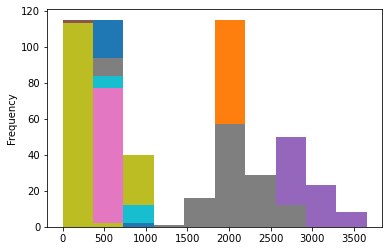

In [240]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='DEC'>

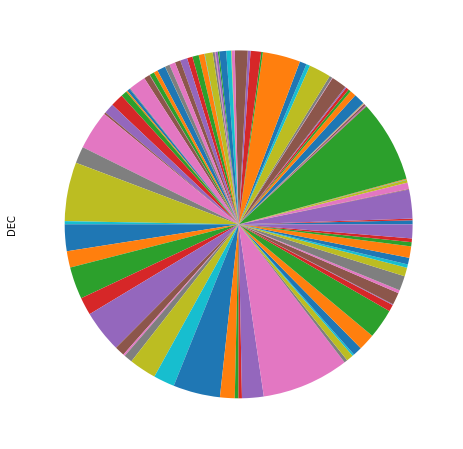

In [241]:
a.plot.pie(y='DEC',figsize=(8,8),labels=None,legend=None)